In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [3]:
df = pd.read_csv('../data/n_comensales_train.csv', index_col=0)
df = df.set_index('Recipe_id')
df.head()

,Total_Grams,Num_comensales,Categoria
Recipe_id,,,
1,168.0,4.0,Cócteles y bebidas
5,186.0,6.0,Recetas de Verduras
8,842.5,4.0,Cócteles y bebidas
10,1100.0,1.0,Cócteles y bebidas
27,631.0,4.0,Recetas de Pescado


<AxesSubplot:xlabel='Total_Grams', ylabel='Num_comensales'>

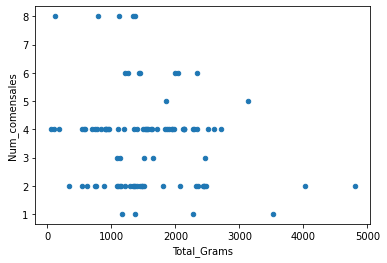

In [78]:
df[df['Categoria'] == 'Recetas de Carne'].plot.scatter('Total_Grams', 'Num_comensales')

In [4]:
df = df[df['Num_comensales']<10]

In [24]:
df.rename({'Num_comensales': 'Comensales', 'Total_Grams': 'Gramos Totales'}, axis=1, inplace=True)

In [16]:
font = {
        'weight' : 'normal',
        'size'   : 16}

plt.rc('font', **font)

In [19]:
sns.light_palette("seagreen", as_cmap=True)

[Text(0, 0.0, ''),
 Text(0, 2.5e-05, ''),
 Text(0, 5e-05, ''),
 Text(0, 7.500000000000001e-05, ''),
 Text(0, 0.0001, ''),
 Text(0, 0.000125, ''),
 Text(0, 0.00015000000000000001, ''),
 Text(0, 0.000175, ''),
 Text(0, 0.0002, ''),
 Text(0, 0.00022500000000000002, '')]

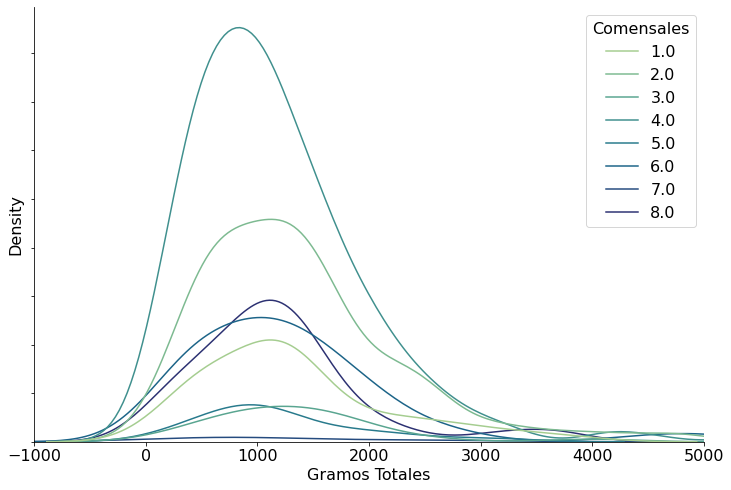

In [26]:
f, ax = plt.subplots(figsize=(12, 8))
sns.kdeplot(data=df, x='Gramos Totales', hue='Comensales', palette=sns.color_palette("crest", as_cmap=True), ax=ax)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlim(-1000, 5000)
ax.set_yticklabels([])

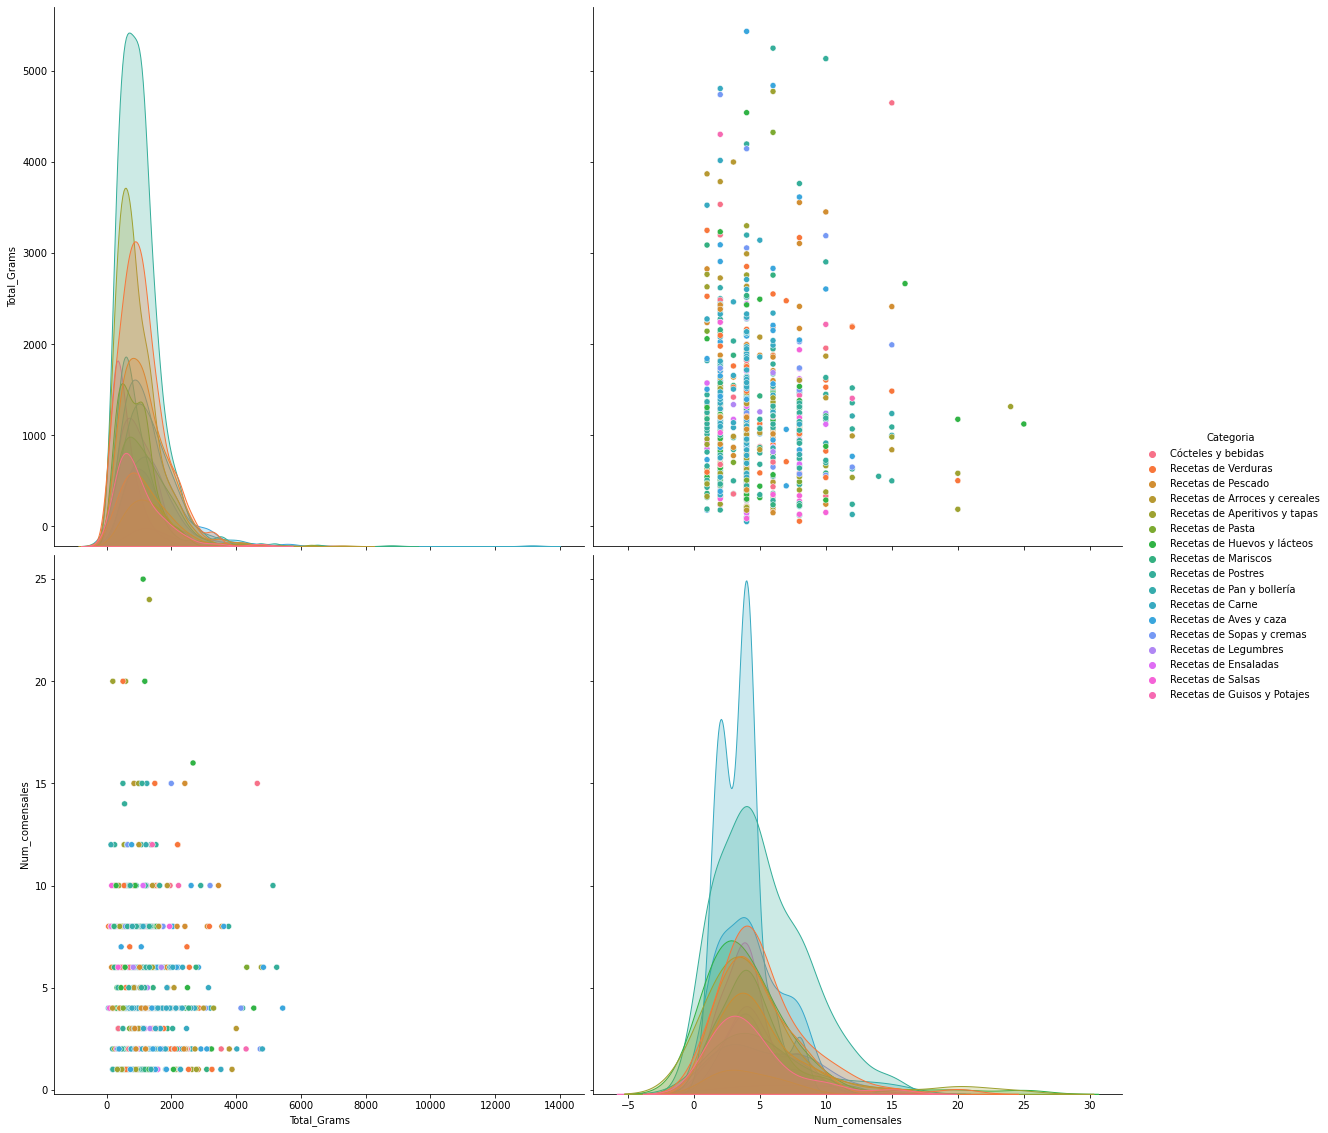

In [85]:
sns.pairplot(data=df, hue='Categoria', height=8)

In [77]:
df[(~df['Num_comensales'].isna()) & (df['Categoria']=='Recetas de Carne')].sort_values('Total_Grams',ascending=False)

,Total_Grams,Num_comensales,Categoria
Recipe_id,,,
20836,4807.0,2.0,Recetas de Carne
20602,4017.5,2.0,Recetas de Carne
21046,3526.0,1.0,Recetas de Carne
21113,3142.0,5.0,Recetas de Carne
20669,2710.0,4.0,Recetas de Carne
...,...,...,...
20714,346.0,2.0,Recetas de Carne
1734,183.0,4.0,Recetas de Carne
6592,120.0,8.0,Recetas de Carne


In [27]:
model_df = df[~df['Num_comensales'].isna()].copy()
problem_df = df[df['Num_comensales'].isna()].copy()

In [50]:
X = model_df[['Total_Grams','Categoria']]
Y = model_df['Num_comensales']

In [65]:
X['Categoria'].nunique()

17

In [52]:
prepro = ColumnTransformer(transformers=[
    ('num', StandardScaler(), ['Total_Grams']),
    ('cat', OneHotEncoder(), ['Categoria'])
])
pipe = Pipeline(steps=[('preprocessor', prepro),
                      ('classifier', LinearRegression())])

In [53]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

In [54]:
pipe.fit(X_train, Y_train)
print("model score: %.3f" % pipe.score(X_test, Y_test))

model score: -0.036


In [55]:
y_pred = pipe.predict(X_test)

In [59]:
mean_squared_error(Y_test,y_pred)

10.040482323136207

In [60]:
Y_test

Recipe_id
7006      2.0
8012      3.0
16343     4.0
8056      2.0
9584      4.0
         ... 
10886     8.0
7643      2.0
10728     1.0
12840     2.0
10821    10.0
Name: Num_comensales, Length: 197, dtype: float64

In [61]:
y_pred

array([5.78371358, 4.10196435, 5.47744429, 5.38282061, 5.13272954,
       2.84321968, 4.35568498, 5.14504964, 5.92336031, 5.47711648,
       4.22445574, 5.24295533, 5.30676886, 4.70078623, 5.025973  ,
       3.07062984, 5.41767766, 4.94434849, 4.44141628, 4.62888673,
       4.42416266, 4.52395345, 3.5626517 , 4.77177723, 4.85638635,
       6.04947266, 5.04749914, 3.59324723, 4.82972453, 4.24968638,
       7.40125302, 6.22254088, 4.22123949, 4.29518138, 5.27114692,
       4.23060296, 3.42672014, 5.35397339, 4.34795867, 4.1289821 ,
       5.07686466, 4.12049278, 3.59794583, 6.06389627, 4.27868165,
       4.87445229, 5.1708373 , 4.32424714, 4.74074463, 3.39601534,
       4.27955581, 5.02131083, 4.58670643, 4.54602593, 5.39811837,
       4.7018446 , 6.23674595, 5.36533745, 5.36761438, 4.84691606,
       5.19159855, 4.74158002, 6.15085993, 4.70253454, 4.97814928,
       4.43449786, 3.87166655, 5.83069957, 4.89417523, 4.92886837,
       5.27223962, 5.35222508, 4.79271826, 4.45056051, 5.46990